In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wages = pd.read_csv('../data/EPI Data Library - Medianaverage hourly wages.csv')
print(wages.shape)
wages.head(3)

(46, 31)


,Date,Median,Average,Men Median,Men Average,Women Median,Women Average,White Median,White Average,Black Median,...,Black Women Median,Black Women Average,Hispanic Women Median,Hispanic Women Average,Recent high-school graduate,Men Recent high-school graduate,Women Recent high-school graduate,Recent college graduate,Men Recent college graduate,Women Recent college graduate
0,2018,$18.80,$25.60,$20.10,$28.49,$16.93,$22.50,$20.57,$27.84,$15.08,...,$14.88,$19.35,$13.94,$17.68,$11.87,$12.52,$10.91,$20.66,$22.02,$19.60
1,2017,$18.49,$25.07,$20.41,$27.70,$16.90,$22.24,$20.49,$27.16,$15.31,...,$14.78,$18.72,$13.52,$17.63,$11.58,$12.21,$10.77,$20.66,$22.27,$19.42
2,2016,$18.33,$24.89,$20.12,$27.62,$16.69,$21.95,$20.22,$26.86,$15.58,...,$14.70,$18.76,$13.49,$17.32,$11.34,$11.83,$10.67,$19.65,$21.42,$18.33


In [3]:
wages.columns

Index(['Date', 'Median', 'Average', 'Men Median', 'Men Average',
       'Women Median', 'Women Average', 'White Median', 'White Average',
       'Black Median', 'Black Average', 'Hispanic Median', 'Hispanic Average',
       'White Men Median', 'White Men Average', 'Black Men Median',
       'Black Men Average', 'Hispanic Men Median', 'Hispanic Men Average',
       'White Women Median', 'White Women Average', 'Black Women Median',
       'Black Women Average', 'Hispanic Women Median',
       'Hispanic Women Average', 'Recent high-school graduate',
       'Men Recent high-school graduate', 'Women Recent high-school graduate',
       'Recent college graduate', 'Men Recent college graduate',
       'Women Recent college graduate'],
      dtype='object')

#### Keeping just the columns that contain median values along with the year

In [4]:
median_cols = [col for col in wages.columns if col[-6:] == 'Median']
median_cols.append('Date')

In [5]:
median_wages = wages[median_cols]
median_wages.head(3)

,Median,Men Median,Women Median,White Median,Black Median,Hispanic Median,White Men Median,Black Men Median,Hispanic Men Median,White Women Median,Black Women Median,Hispanic Women Median,Date
0,$18.80,$20.10,$16.93,$20.57,$15.08,$15.04,$22.99,$16.01,$16.10,$18.67,$14.88,$13.94,2018
1,$18.49,$20.41,$16.90,$20.49,$15.31,$15.27,$22.62,$15.57,$15.83,$18.44,$14.78,$13.52,2017
2,$18.33,$20.12,$16.69,$20.22,$15.58,$14.72,$22.61,$15.81,$15.70,$18.14,$14.70,$13.49,2016


#### Since we'll be looking at the change from 1979 to 2018, we only need those rows

In [6]:
median_wages = median_wages.loc[median_wages.Date.isin([2018, 1979])]
median_wages

,Median,Men Median,Women Median,White Median,Black Median,Hispanic Median,White Men Median,Black Men Median,Hispanic Men Median,White Women Median,Black Women Median,Hispanic Women Median,Date
0,$18.80,$20.10,$16.93,$20.57,$15.08,$15.04,$22.99,$16.01,$16.10,$18.67,$14.88,$13.94,2018
39,$16.49,$20.70,$13.11,$17.14,$14.32,$14.13,$21.89,$16.43,$16.16,$13.28,$12.41,$11.61,1979


#### Melting the df to be able to calculate change and get percentiles on the change amounts

In [7]:
melted_wages = median_wages.melt(id_vars = 'Date')

In [8]:
melted_wages = melted_wages.iloc[2:, :]

In [9]:
melted_wages['amount'] = melted_wages.value.str[1:].astype(float)

In [10]:
melted_wages = melted_wages.sort_values(['variable', 'Date'])
melted_wages['change'] = melted_wages.amount.diff()

#### the change amount in the 1979 data are convenience garbage; we only need 2018 now

In [11]:
wage_change = melted_wages.loc[melted_wages.Date == 2018]

In [12]:
wage_change

,Date,variable,value,amount,change
8,2018,Black Median,$15.08,15.08,0.76
14,2018,Black Men Median,$16.01,16.01,-0.42
20,2018,Black Women Median,$14.88,14.88,2.47
10,2018,Hispanic Median,$15.04,15.04,0.91
16,2018,Hispanic Men Median,$16.10,16.10,-0.06
22,2018,Hispanic Women Median,$13.94,13.94,2.33
2,2018,Men Median,$20.10,20.10,-0.60
6,2018,White Median,$20.57,20.57,3.43
12,2018,White Men Median,$22.99,22.99,1.10
18,2018,White Women Median,$18.67,18.67,5.39


#### Getting the percentiles in a df and adding plot-worthy description column

In [13]:
change_percentiles = wage_change.change.quantile([.10, .20, .30, .40, .50, .60, .70, .80, .90])

In [14]:
change_percentiles = change_percentiles.to_frame().reset_index()
change_percentiles.columns = ['percentile', 'amount']

In [15]:
change_percentiles.percentile = change_percentiles.percentile *100

In [16]:
change_percentiles['text_desc'] = change_percentiles.percentile.astype(str) 

In [17]:
change_percentiles['text_desc'] = change_percentiles.text_desc.str[0:2] + 'th percentile'

In [18]:
change_percentiles

,percentile,amount,text_desc
0,10.0,-0.42,10th percentile
1,20.0,-0.06,20th percentile
2,30.0,0.76,30th percentile
3,40.0,0.91,40th percentile
4,50.0,1.10,50th percentile
5,60.0,2.33,60th percentile
6,70.0,2.47,70th percentile
7,80.0,3.43,80th percentile
8,90.0,3.82,90th percentile


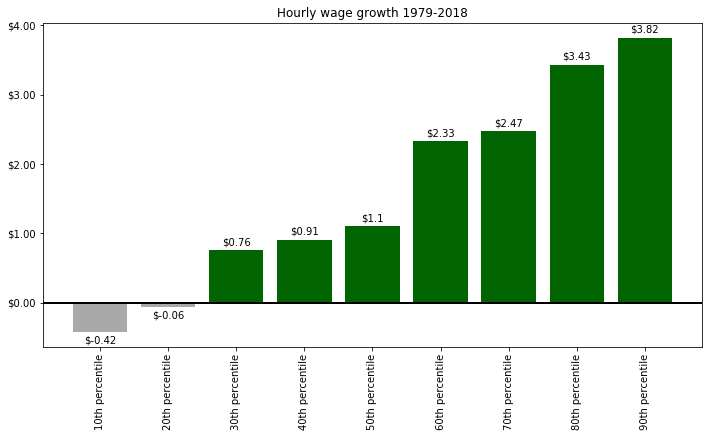

In [22]:
fig, ax = plt.subplots(figsize = (10, 6))

colors = np.where(change_percentiles.amount > 0, 'darkgreen', 'darkgray')
change_bars = ax.bar(change_percentiles.text_desc, change_percentiles.amount, color = colors)
plt.axhline(y=0, linewidth = 2, color = 'black')
plt.yticks([0, 1, 2, 3, 4], ['$0.00', '$1.00', '$2.00', '$3.00', '$4.00'])
plt.xticks(rotation = 90)

def autolabel(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate('${}'.format(round(height, 3)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate('$-{}'.format(abs(round(height, 2))),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, -3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='top')
        
autolabel(change_bars)
plt.tight_layout()
plt.title('Hourly wage growth 1979-2018')
plt.savefig('hourly_wage_growth.png');
 
    